Archivo con EDA

In [23]:
#Traigo mis librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#Importo mis archivos para iniciar el EDA
df_calidadDelAire = pd.read_csv("..\Datasets_procesados_contaminacion\Calidad del aire.csv")
df_contaminacion_sonora = pd.read_csv("..\Datasets_procesados_contaminacion\Sonido_presencia.csv")

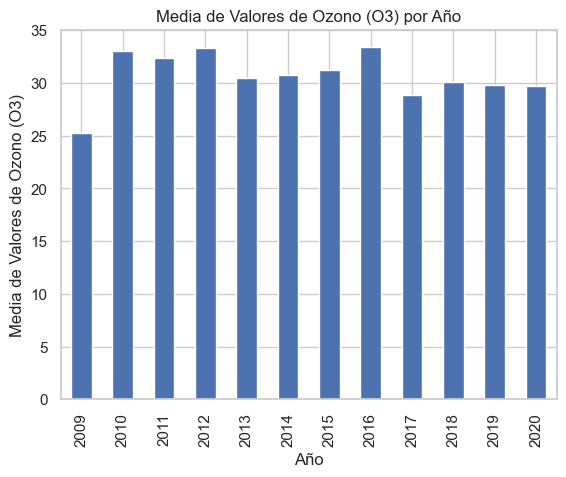

In [25]:
# Filtrar los datos para obtener solo los registros de ozono
df_ozono = df_calidadDelAire[df_calidadDelAire['Name'] == 'Ozone (O3)']

# Agrupar los datos por año y calcular la media de los valores de ozono para cada año
medias_por_año = df_ozono.groupby('Final Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = medias_por_año.plot(kind='bar', title='Media de Valores de Ozono (O3) por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Media de Valores de Ozono (O3)')

plt.show()

#Si obtenemos los datos para las medias si se notan los cambios, observando un mayor crecimiento en 2016 sin embargo con cierta 
#tendencia a la disminución en 2020

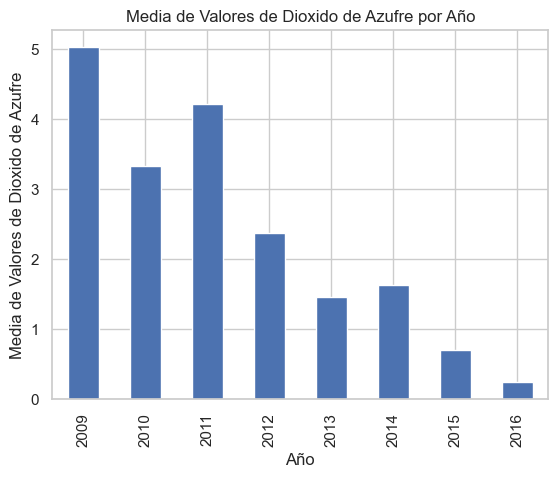

In [26]:
# Filtrar los datos para obtener solo los registros de ozono
df_ozono = df_calidadDelAire[df_calidadDelAire['Name'] == 'Sulfur Dioxide (SO2)']

# Agrupar los datos por año y calcular la media de los valores de ozono para cada año
medias_por_año = df_ozono.groupby('Final Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = medias_por_año.plot(kind='bar', title='Media de Valores de Dioxido de Azufre por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Media de Valores de Dioxido de Azufre')

plt.show()

#Se observa calculado por las medias que existe una disminución progresiva del consumo de Dioxido de azufre

#En fecha de finalización se confirma que se mantuvo registro hasta el 2015


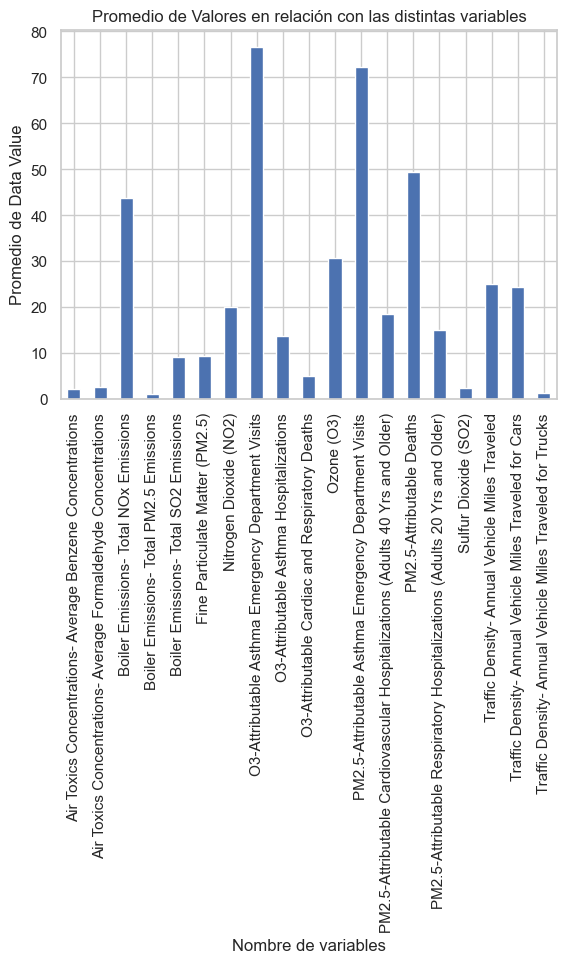

In [27]:
#Genero una relación o agrupación 
promedio_data_value = df_calidadDelAire.groupby('Name')['Data Value'].mean()

# Trazar el gráfico de barras
promedio_data_value.plot(kind='bar', title='Promedio de Valores en relación con las distintas variables')
plt.xlabel('Nombre de variables')
plt.ylabel('Promedio de Data Value')
plt.show()


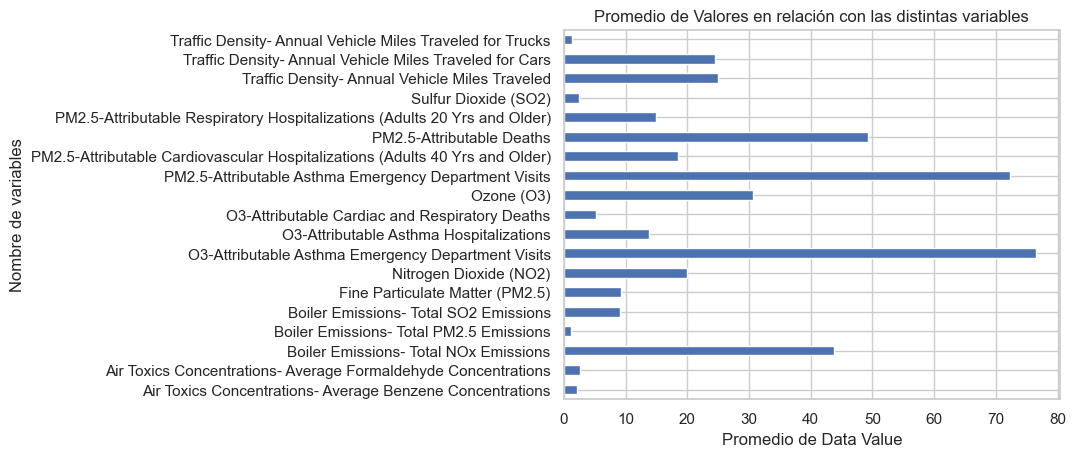

In [28]:
# Genero una relación o agrupación 
promedio_data_value = df_calidadDelAire.groupby('Name')['Data Value'].mean()

# Trazar el histograma horizontal
promedio_data_value.plot(kind='barh', title='Promedio de Valores en relación con las distintas variables')
plt.xlabel('Promedio de Data Value')
plt.ylabel('Nombre de variables')
plt.show()


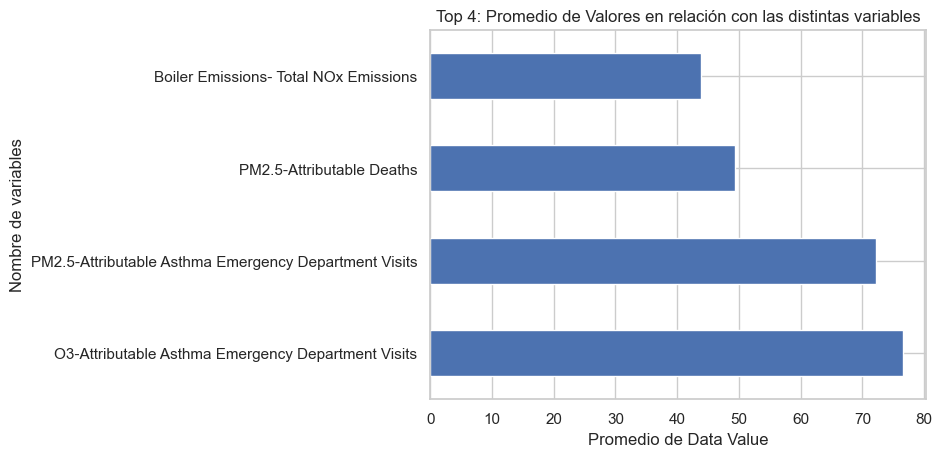

In [29]:
# Genero una relación o agrupación 
promedio_data_value = df_calidadDelAire.groupby('Name')['Data Value'].mean()

# Ordenar el DataFrame en orden descendente
top_4 = promedio_data_value.sort_values(ascending=False).head(4)

# Trazar el histograma horizontal para el top 4
top_4.plot(kind='barh', title='Top 4: Promedio de Valores en relación con las distintas variables')
plt.xlabel('Promedio de Data Value')
plt.ylabel('Nombre de variables')
plt.show()


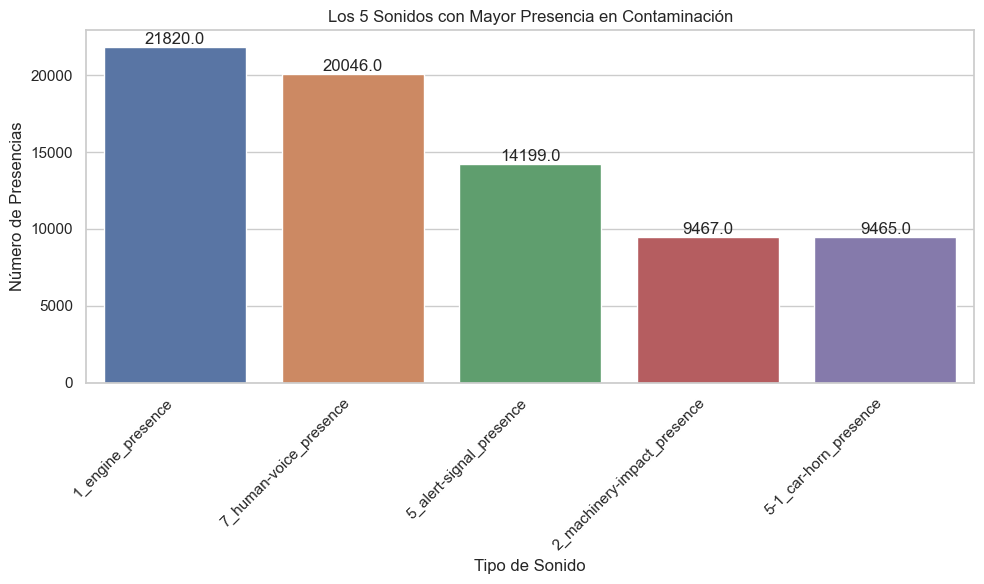

In [30]:
# Filtrar las columnas de interés
columns_of_interest = [
    '5-1_car-horn_presence', '5-2_car-alarm_presence', '5-4_reverse-beeper_presence',
    '1_engine_presence', '2_machinery-impact_presence', '3_non-machinery-impact_presence',
    '4_powered-saw_presence', '5_alert-signal_presence', '6_music_presence',
    '7_human-voice_presence', '8_dog_presence'
]
filtered_df = df_contaminacion_sonora[columns_of_interest]

# Reemplazar -1 con 1 para tratar ambos como presencia
filtered_df = filtered_df.replace(-1, 1)

# Calcular la suma de presencias para cada columna y ordenar de mayor a menor
sum_of_presences = filtered_df.sum().sort_values(ascending=False)

# Tomar solo los 5 sonidos con mayor presencia
top5_presences = sum_of_presences[:5]

# Crear un gráfico de barras utilizando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Gráfico de barras
ax = sns.barplot(x=top5_presences.index, y=top5_presences.values)

# Personalizar el gráfico
plt.title('Los 5 Sonidos con Mayor Presencia en Contaminación')
plt.xlabel('Tipo de Sonido')
plt.ylabel('Número de Presencias')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de valor en las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

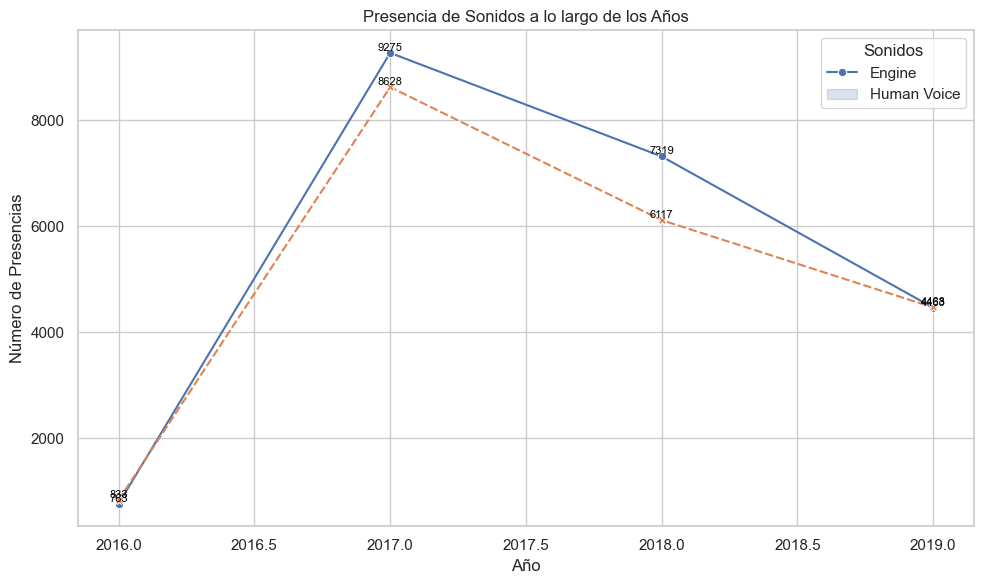

In [31]:
# Supongamos que tienes un DataFrame llamado df_contaminacion_sonora

# Filtrar las columnas de interés
columns_of_interest = ['year', '1_engine_presence', '7_human-voice_presence']
filtered_df = df_contaminacion_sonora[columns_of_interest]

# Reemplazar -1 con 1 para tratar ambos como presencia
filtered_df = filtered_df.replace(-1, 1)

# Agrupar y contar las presencias por año
grouped_df = filtered_df.groupby('year').sum()

# Crear un gráfico de línea utilizando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Gráfico para presencia de engine y human-voice
sns.lineplot(data=grouped_df, markers=True)

# Personalizar el gráfico
plt.title('Presencia de Sonidos a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Número de Presencias')
plt.legend(title='Sonidos', labels=['Engine', 'Human Voice'])

# Mostrar los valores en los puntos del gráfico
for col in grouped_df.columns:
    for x, y in zip(grouped_df.index, grouped_df[col]):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()